In [132]:
#imports
from sklearn import datasets as ds
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
import matplotlib.pyplot as plt
import numpy as np

In [133]:
#Generate 2 classes dataset
X, y = ds.make_classification(n_samples=1000, n_classes=2, random_state=0)


In [134]:
#split training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [135]:
#model
model = LogisticRegression(solver='lbfgs', random_state=42)

#fit
model.fit(X_train, y_train)

#performance
pred_prob = model.predict_proba(X_test)
pred_prob = pred_prob[:,1]

In [136]:
pred_prob

array([9.48719128e-03, 5.16784379e-02, 5.29667805e-01, 7.86346154e-01,
       9.49810468e-01, 9.99611775e-01, 9.99262352e-01, 1.57364012e-01,
       1.16023641e-01, 9.65565582e-01, 8.00166924e-06, 9.99835295e-01,
       8.55457220e-01, 1.79840539e-01, 1.03155631e-04, 9.93968521e-01,
       6.09642668e-04, 2.17288346e-02, 4.06860621e-03, 2.80757829e-03,
       7.00870448e-02, 2.14801948e-02, 9.91275992e-01, 9.90439510e-01,
       4.99593141e-02, 6.72487344e-01, 4.02207688e-02, 1.81206908e-02,
       9.12770848e-01, 1.29171071e-02, 9.96334302e-01, 1.36927919e-01,
       9.98269246e-01, 5.71439818e-04, 9.57134208e-01, 7.95717343e-02,
       6.71135629e-02, 1.68605718e-01, 3.40005414e-02, 9.05102552e-01,
       5.32498256e-01, 7.43879553e-01, 9.97355027e-01, 9.99940855e-01,
       5.50873291e-01, 4.91780131e-02, 9.94466811e-01, 9.99947469e-01,
       9.98388023e-01, 1.63815349e-02, 2.55517077e-01, 9.86469742e-01,
       9.78367358e-01, 7.93463502e-02, 9.99338219e-01, 9.97539884e-01,
      

In [137]:
y_test

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0])

In [138]:
#roc curve
fpr, tpr, thresholds = mt.roc_curve(y_test, pred_prob)

Text(0.5, 1.0, 'FPR x TPR')

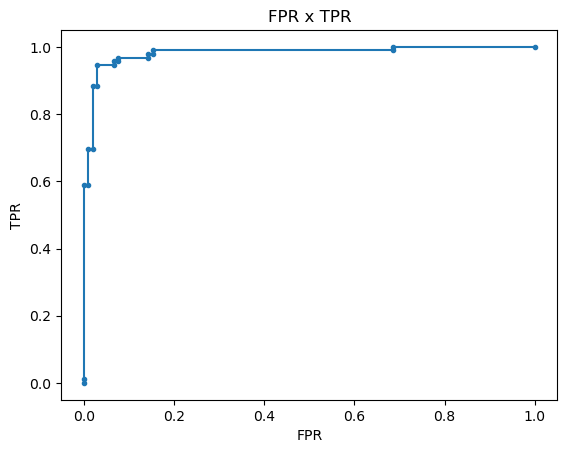

In [139]:
plt.plot(fpr, tpr, marker='.')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("FPR x TPR")

In [140]:
#Ponto mais próximo de (0,1): Melhor para otimizar o desempenho geral, minimizando falsos positivos e negativos de forma ideal. Útil em problemas críticos (ex: saúde, segurança).

# Calcula a distância de cada ponto ao ideal (0,1)
distances = np.sqrt((fpr - 0)**2 + (tpr - 1)**2)

# Encontra o índice do menor valor (ponto mais próximo de (0, 1))
best_index = np.argmin(distances)

# Obtém o threshold correspondente
best_threshold = thresholds[best_index]

print(f"O melhor threshold é: {best_threshold}")

O melhor threshold é: 0.41848553763161084


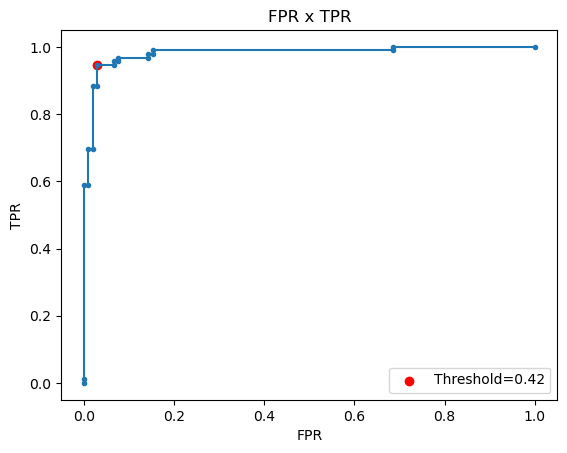

In [141]:
# Plotagem
plt.plot(fpr, tpr, marker='.')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("FPR x TPR")
plt.scatter(fpr[best_index], tpr[best_index], color='red', label=f'Threshold={best_threshold:.2f}')
plt.legend()
plt.show()

Threshold que equilibra TPR e 1-FPR: 0.3614945218558142


C:\Users\Luigi\AppData\Local\Temp\ipykernel_32552\1742347199.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b--" (-> color='b'). The keyword argument will take precedence.
  plt.plot(thresholds, tpr, 'b--', label='True Posite Rate', color='r')
C:\Users\Luigi\AppData\Local\Temp\ipykernel_32552\1742347199.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b--" (-> color='b'). The keyword argument will take precedence.
  plt.plot(thresholds, 1-fpr, 'b--', label='False Posite Rate', color='b')


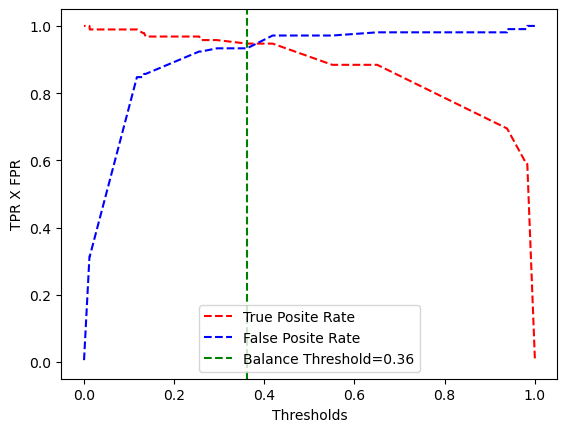

In [142]:
#Interseção das curvas: Melhor para balancear erros e acertos quando falsos positivos e negativos têm custos similares. Útil em problemas menos críticos (ex: filtros de spam).
# Visualização e entendimento.

# Calcula a diferença entre TPR e (1 - FPR)
differences = np.abs(tpr - (1 - fpr))

# Encontra o índice onde a diferença é mínima
balance_index = np.argmin(differences)

# Threshold correspondente
balance_threshold = thresholds[balance_index]

print(f"Threshold que equilibra TPR e 1-FPR: {balance_threshold}")

# Plotagem com a linha do threshold balanceado
plt.plot(thresholds, tpr, 'b--', label='True Posite Rate', color='r')
plt.plot(thresholds, 1-fpr, 'b--', label='False Posite Rate', color='b')
plt.xlabel('Thresholds')
plt.ylabel('TPR X FPR')
plt.axvline(balance_threshold, 0, 1, color='green', linestyle='--', label=f'Balance Threshold={balance_threshold:.2f}')
plt.legend()
plt.show()

In [146]:
#Ponto mais próximo de (0,1): Melhor para otimizar o desempenho geral, minimizando falsos positivos e negativos de forma ideal. Útil em problemas críticos (ex: saúde, segurança).

#Interseção das curvas: Melhor para balancear erros e acertos quando falsos positivos e negativos têm custos similares. Útil em problemas menos críticos (ex: filtros de spam).


In [144]:
pred_prob

array([9.48719128e-03, 5.16784379e-02, 5.29667805e-01, 7.86346154e-01,
       9.49810468e-01, 9.99611775e-01, 9.99262352e-01, 1.57364012e-01,
       1.16023641e-01, 9.65565582e-01, 8.00166924e-06, 9.99835295e-01,
       8.55457220e-01, 1.79840539e-01, 1.03155631e-04, 9.93968521e-01,
       6.09642668e-04, 2.17288346e-02, 4.06860621e-03, 2.80757829e-03,
       7.00870448e-02, 2.14801948e-02, 9.91275992e-01, 9.90439510e-01,
       4.99593141e-02, 6.72487344e-01, 4.02207688e-02, 1.81206908e-02,
       9.12770848e-01, 1.29171071e-02, 9.96334302e-01, 1.36927919e-01,
       9.98269246e-01, 5.71439818e-04, 9.57134208e-01, 7.95717343e-02,
       6.71135629e-02, 1.68605718e-01, 3.40005414e-02, 9.05102552e-01,
       5.32498256e-01, 7.43879553e-01, 9.97355027e-01, 9.99940855e-01,
       5.50873291e-01, 4.91780131e-02, 9.94466811e-01, 9.99947469e-01,
       9.98388023e-01, 1.63815349e-02, 2.55517077e-01, 9.86469742e-01,
       9.78367358e-01, 7.93463502e-02, 9.99338219e-01, 9.97539884e-01,
      

In [145]:
th = best_threshold
pred_prob = [1 if x > th else 0 for x in pred_prob]
pred_prob

[0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0]